In [1]:
import numpy as np
import pandas as pd
import os
from pathlib import Path

In [2]:
path = 'Toddler_Autism_dataset_July_2018.csv'
data = pd.read_csv(path)

In [3]:
data.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat_10_Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,Class_ASD_Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [4]:
data.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat_10_Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who_completed_the_test', 'Class_ASD_Traits'],
      dtype='object')

In [5]:
def word_to_bool(x):
    if type(x) == str:
        if str.lower(x) == 'yes':
            return 1
        else:
            return 0
    else:
        return x
    
data['Class_ASD_Traits'] = data['Class_ASD_Traits'].apply(word_to_bool)
data['Jaundice'] = data['Jaundice'].apply(word_to_bool)
data['Family_mem_with_ASD'] = data['Family_mem_with_ASD'].apply(word_to_bool)

In [6]:
data.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat_10_Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,Class_ASD_Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,1,0,family member,0
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,1,0,family member,1
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,1,0,family member,1
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,0,0,family member,1
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,0,1,family member,1


In [7]:
def gender_to_int(gender):
    if str.lower(gender) == "m":
        return 1
    else:
        return 0

data['Sex'] = data['Sex'].apply(gender_to_int)
data.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat_10_Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,Class_ASD_Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,0,middle eastern,1,0,family member,0
1,2,1,1,0,0,0,1,1,0,0,0,36,4,1,White European,1,0,family member,1
2,3,1,0,0,0,0,0,1,1,0,1,36,4,1,middle eastern,1,0,family member,1
3,4,1,1,1,1,1,1,1,1,1,1,24,10,1,Hispanic,0,0,family member,1
4,5,1,1,0,1,1,1,1,1,1,1,20,9,0,White European,0,1,family member,1


In [8]:
df1 = data[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
            'Age_Mons', 'Qchat_10_Score', 'Sex', 'Jaundice', 'Family_mem_with_ASD']]
df2 = data.Ethnicity.str.get_dummies()
df3 = data.Who_completed_the_test.str.get_dummies()
labels = data['Class_ASD_Traits']

In [10]:
data = pd.concat([df1, df2, df3], axis=1)
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,asian,black,middle eastern,mixed,south asian,Health Care Professional,Health care professional,Others,Self,family member
0,0,0,0,0,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,1
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,1,1,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [14]:
from sklearn.utils import shuffle
shuffle(data, labels)

train_data, train_labels = data.iloc[:600], labels[:600]
val_data, val_labels = data.iloc[600:850], labels[600:850]
test_data, test_labels = data.iloc[850:], labels[850:]

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
rf = RandomForestClassifier()
rf.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
pred = rf.predict(val_data)
np.sum(np.where(pred == val_labels, 1, 0))

250

In [19]:
from sklearn.manifold import TSNE

emb = TSNE().fit_transform(train_data)

In [21]:
import matplotlib.pyplot as plt

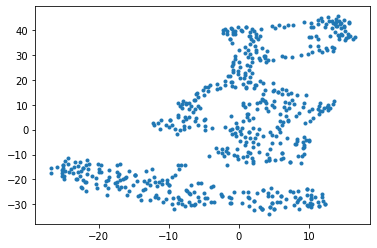

In [22]:
plt.plot(emb[:, 0], emb[:, 1], '.')
plt.show()

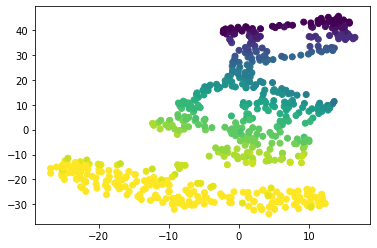

In [25]:
plt.scatter(emb[:, 0], emb[:, 1], c=train_data.Age_Mons)
plt.show()

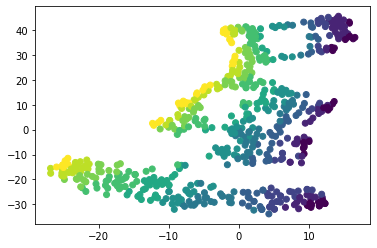

In [26]:
plt.scatter(emb[:, 0], emb[:, 1], c=train_data.Qchat_10_Score)
plt.show()